In [1]:
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from pprint import pprint
from random import randint, gauss
import numpy as np
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))
greys = cm.get_cmap(plt.get_cmap('Greys'))
set1 = cm.get_cmap(plt.get_cmap('Set1'))
tab20 = cm.get_cmap(plt.get_cmap('tab20'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

In [2]:
resources = pd.read_csv('../Data/heterogeneous_resources.csv', index_col=0)
resources

,PFlops Mean,Pflops STD
PSC Bridges,1.300,0.0834
SDSC Comet,2.760,0.1780
TACC Frontera,23.516,1.5170
TACC Stampede2,10.680,0.6890


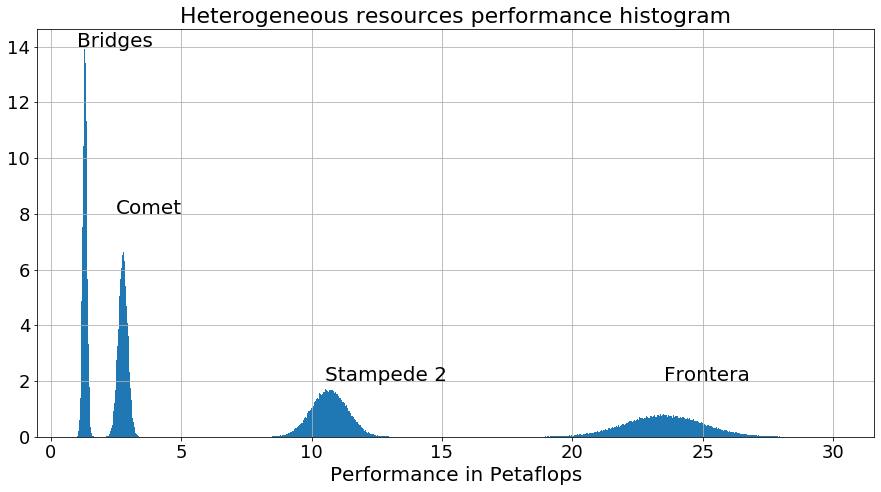

In [3]:
data_bridges = [gauss(resources.loc['PSC Bridges']['PFlops Mean'], resources.loc['PSC Bridges']['Pflops STD']) for _ in range(100000)] + \
               [gauss(resources.loc['SDSC Comet']['PFlops Mean'], resources.loc['SDSC Comet']['Pflops STD']) for _ in range(100000)] + \
               [gauss(resources.loc['TACC Frontera']['PFlops Mean'], resources.loc['TACC Frontera']['Pflops STD']) for _ in range(100000)] + \
               [gauss(resources.loc['TACC Stampede2']['PFlops Mean'], resources.loc['TACC Stampede2']['Pflops STD']) for _ in range(100000)]

fig, axis = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(15,7.5)
_ = axis.hist(data_bridges, bins=1000)# _ = axis.set_yscale('symlog')
_ = axis.set_xlabel('Performance in Petaflops',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on')
_ = axis.text(1, 14000, 'Bridges', fontsize=20)
_ = axis.text(2.5, 8000, 'Comet', fontsize=20)
_ = axis.text(23.5, 2000, 'Frontera', fontsize=20)
_ = axis.text(10.5, 2000, 'Stampede 2', fontsize=20)
_ = axis.set_title('Heterogeneous resources performance histogram', fontsize=22)

# Homogeneous resources - Homogeneous workflows


In [4]:
HomogeResources_StHomogeCampaigns = pd.read_csv('../Data/HomogeResources_StHomogeCampaigns.csv')

HomogeResources_StHomogeCampaigns = HomogeResources_StHomogeCampaigns.groupby(by=['planner','size'])
HomogeResources_StHomogeCampaigns_makespan_means = HomogeResources_StHomogeCampaigns.mean()
HomogeResources_StHomogeCampaigns_makespan_stds = HomogeResources_StHomogeCampaigns.std()

In [5]:
print('Means')
print(HomogeResources_StHomogeCampaigns_makespan_means/1000)
print('STD')
print(HomogeResources_StHomogeCampaigns_makespan_stds/1000)

Means
               makespan
planner size           
GA      4     19635.000
        8     10245.750
        16     5508.750
        32     3080.250
        64     1794.000
        128    1134.750
GA-25   4     19200.000
        8      9600.000
        16     4800.000
        32     2436.000
        64     1407.750
        128     916.500
GA-50   4     19200.000
        8      9600.000
        16     4800.000
        32     2400.000
        64     1200.000
        128     672.750
HEFT    4     19200.000
        8      9600.000
        16     4800.000
        32     2400.000
        64     1200.000
        128     600.000
L2FF    4     19200.000
        8      9600.000
        16     4800.000
        32     2400.000
        64     1200.000
        128     600.000
RANDOM  4     20430.600
        8     10833.825
        16     5865.075
        32     3325.050
        64     1953.975
        128    1217.250
STD
                makespan
planner size            
GA      4     182.470421
   

In [6]:
ideal = list()
for res in [4, 8, 16, 32, 64, 128]:
    ideal.append( ((75000 * 1024) / res) )

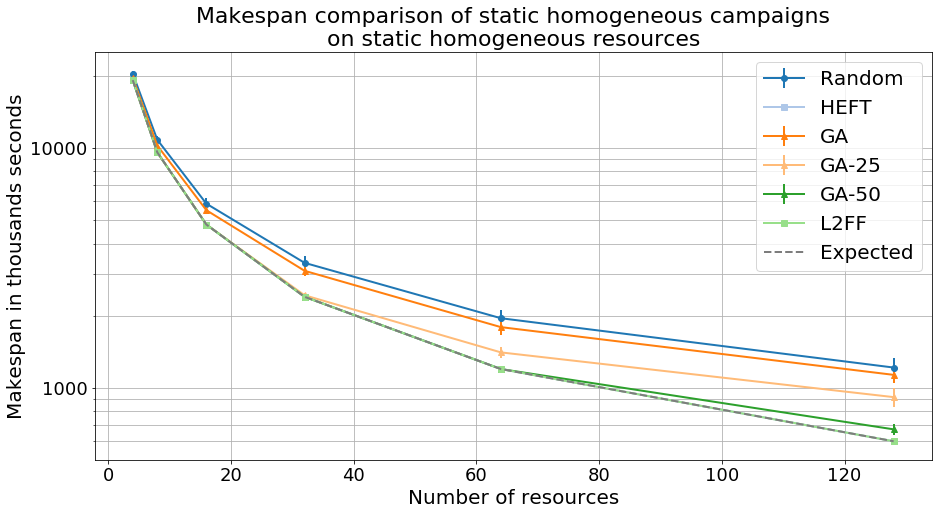

In [7]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values,HomogeResources_StHomogeCampaigns_makespan_stds.xs('RANDOM')['makespan'].values, color=tab20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT').index,HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=tab20(1),linewidth=2)
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('GA').index, HomogeResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values,HomogeResources_StHomogeCampaigns_makespan_stds.xs('GA')['makespan'].values, color=tab20(2),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-25').index, HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-25')['makespan'].values,HomogeResources_StHomogeCampaigns_makespan_stds.xs('GA-25')['makespan'].values, color=tab20(3),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-50').index, HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-50')['makespan'].values,HomogeResources_StHomogeCampaigns_makespan_stds.xs('GA-50')['makespan'].values, color=tab20(4),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(HomogeResources_StHomogeCampaigns_makespan_means.xs('L2FF').index,HomogeResources_StHomogeCampaigns_makespan_means.xs('L2FF')['makespan'].values,marker='s',label='L2FF', color=tab20(5),linewidth=2)
_ = axis.errorbar([4, 8, 16, 32, 64, 128], ideal, linestyle='--',label='Expected', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
#_ = axis.set_xscale('log', basex=2)
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.set_title('Makespan comparison of static homogeneous campaigns\non static homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHomoResources_StHomoCampaigns.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns.pdf',bbox_inches='tight')

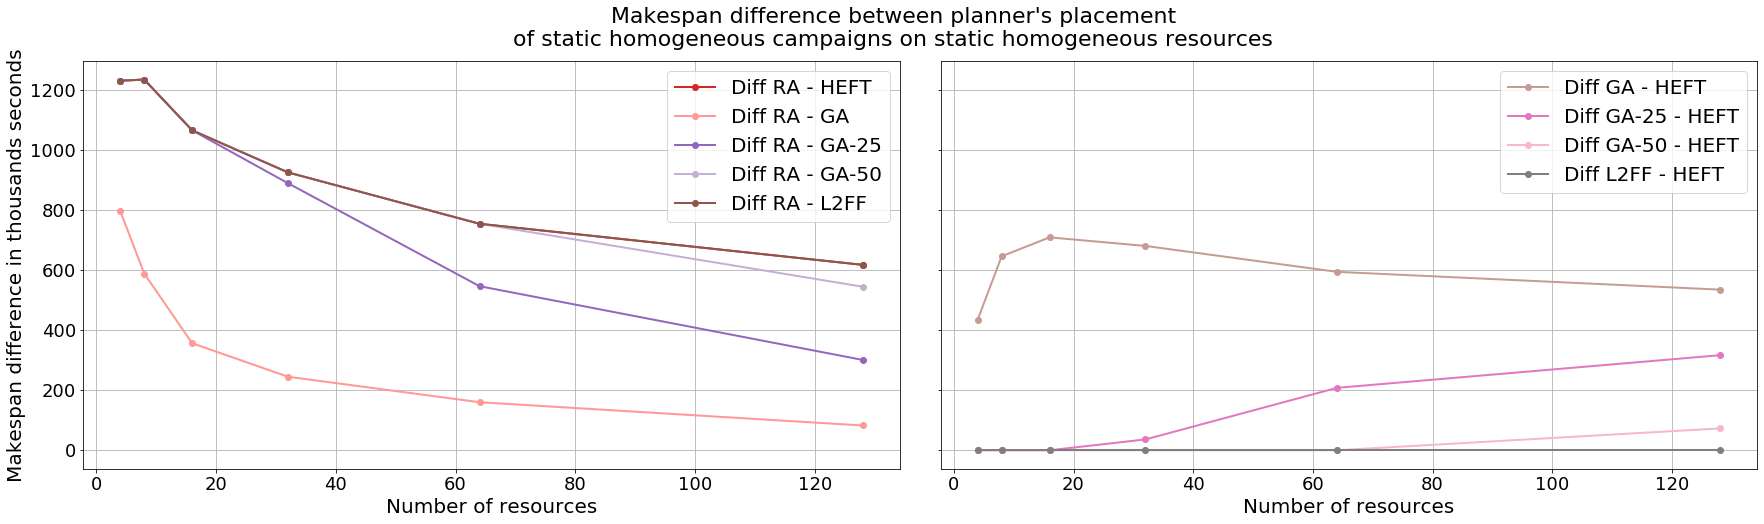

In [8]:
DiffStHomoCamp_4StHomoResHE = abs(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResGA = abs(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values)
DiffStHomoCamp_4StHomoResGA25 = abs(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-25')['makespan'].values)
DiffStHomoCamp_4StHomoResGA50 = abs(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-50')['makespan'].values)
DiffStHomoCamp_4StHomoResL2 = abs(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('L2FF')['makespan'].values)

DiffStHomoCamp_4StHomoResHEGA = (HomogeResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA25 = (HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-25')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResHEGA50 = (HomogeResources_StHomogeCampaigns_makespan_means.xs('GA-50')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
DiffStHomoCamp_4StHomoResHEL2 = (HomogeResources_StHomogeCampaigns_makespan_means.xs('L2FF')['makespan'].values - HomogeResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)

fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(30,7.5), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
_ = axis[0].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT', color=tab20(6))
_ = axis[0].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA', color=tab20(7))
_ = axis[0].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA25, marker='o',linewidth=2, label='Diff RA - GA-25', color=tab20(8))
_ = axis[0].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA50, marker='o',linewidth=2, label='Diff RA - GA-50', color=tab20(9))
_ = axis[0].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResL2, marker='o',linewidth=2, label='Diff RA - L2FF', color=tab20(10))

_ = axis[1].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT', color=tab20(11))
_ = axis[1].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA25, marker='o',linewidth=2, label='Diff GA-25 - HEFT', color=tab20(12))
_ = axis[1].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA50, marker='o',linewidth=2, label='Diff GA-50 - HEFT', color=tab20(13))
_ = axis[1].plot(HomogeResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEL2, marker='o',linewidth=2, label='Diff L2FF - HEFT', color=tab20(14))
#_ = axis.set_yscale('symlog')
_ = axis[0].set_ylabel('Makespan difference in thousands seconds',fontsize=20)
_ = axis[0].set_xlabel('Number of resources',fontsize=20)
_ = axis[0].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[0].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[0].grid('on')
_ = axis[0].legend(fontsize=20)

_ = axis[1].set_xlabel('Number of resources',fontsize=20)
_ = axis[1].set_xticklabels(axis[0].get_xticks().astype('int').tolist(),fontsize=18)
_ = axis[1].set_yticklabels((axis[0].get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis[1].grid('on')
_ = axis[1].legend(fontsize=20)
_ = fig.suptitle("Makespan difference between planner's placement\nof static homogeneous campaigns on static homogeneous resources", fontsize=22)
#fig.savefig('StHomoResources_StHomoCampaigns_diff.png',bbox_inches='tight')

In [9]:
work_per_resource = pd.read_csv('../Data/workflows_per_resource.csv')
work_per_resource = work_per_resource.groupby(by=['planner','size'])
work_per_resource_mean = work_per_resource.mean()
work_per_resource_std = work_per_resource.std()

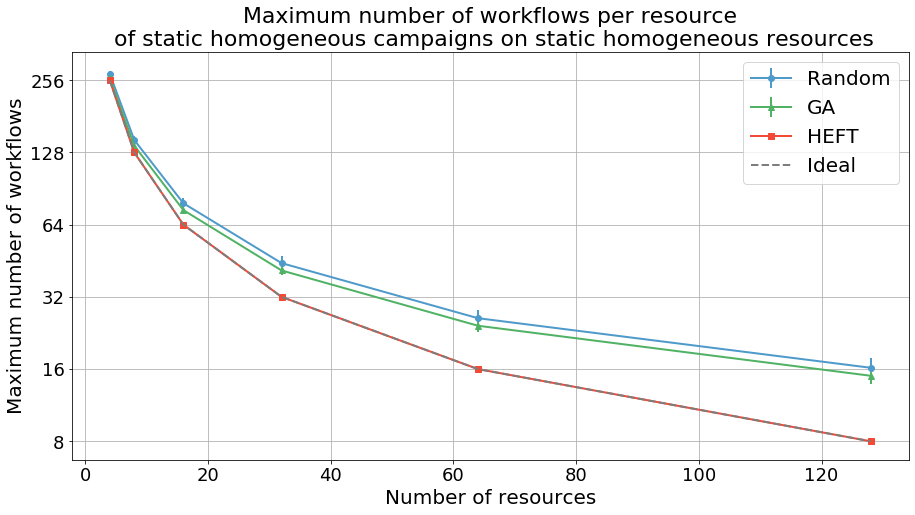

In [10]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(work_per_resource_mean.xs('RAND').index, work_per_resource_mean.xs('RAND')['freqs'].values, work_per_resource_std.xs('RAND')['freqs'].values, color=blues(150),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(work_per_resource_mean.xs('GA').index, work_per_resource_mean.xs('GA')['freqs'].values, work_per_resource_std.xs('GA')['freqs'].values, color=greens(150),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(work_per_resource_mean.xs('HEFT').index, work_per_resource_mean.xs('HEFT')['freqs'].values, color=reds(150),marker='s',label='HEFT',linewidth=2)
_ = axis.errorbar([4, 8, 16, 32, 64, 128], [256, 128, 64, 32, 16, 8], linestyle='--',label='Ideal', color=greys(150),linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log', basey=2)
_ = axis.set_ylabel('Maximum number of workflows',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.set_title('Maximum number of workflows per resource\n of static homogeneous campaigns on static homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHomoCampaigns_4StHomoResources.png',bbox_inches='tight')
#fig.savefig('StHomoResources_StHomoCampaigns_num.pdf',bbox_inches='tight')

# Homogeneous resources - Heterogeneous workflows 

In [11]:
HomogeResources_StHeteroCampaigns = pd.read_csv('../Data/HomogeResources_StHeteroCampaigns.csv')

HomogeResources_StHeteroCampaigns = HomogeResources_StHeteroCampaigns.groupby(by=['planner','size'])
HomogeResources_StHeteroCampaigns_makespan_means = HomogeResources_StHeteroCampaigns.mean()
HomogeResources_StHeteroCampaigns_makespan_stds = HomogeResources_StHeteroCampaigns.std()

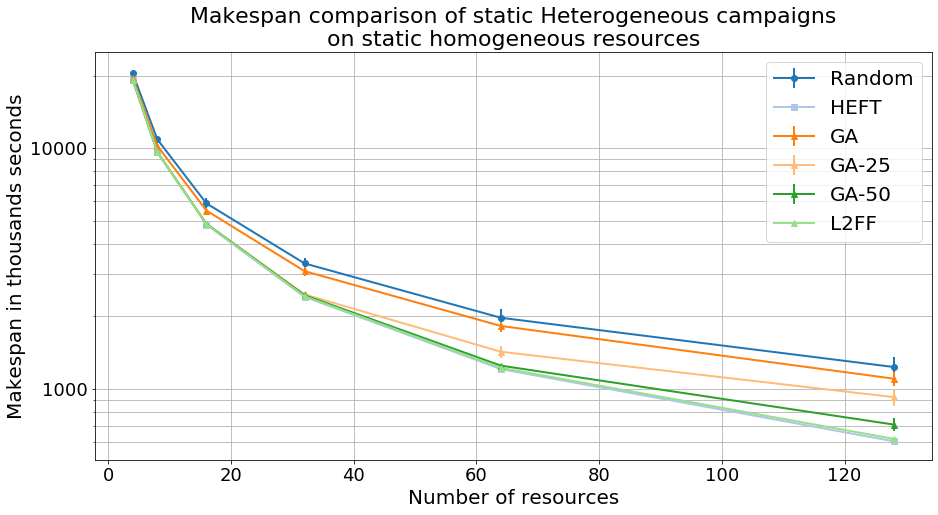

In [12]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(HomogeResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, HomogeResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values,HomogeResources_StHeteroCampaigns_makespan_stds.xs('RANDOM')['makespan'].values, color=tab20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(HomogeResources_StHeteroCampaigns_makespan_means.xs('HEFT').index,HomogeResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=tab20(1),linewidth=2)
_ = axis.errorbar(HomogeResources_StHeteroCampaigns_makespan_means.xs('GA').index, HomogeResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values,HomogeResources_StHeteroCampaigns_makespan_stds.xs('GA')['makespan'].values, color=tab20(2),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(HomogeResources_StHeteroCampaigns_makespan_means.xs('GA-25').index, HomogeResources_StHeteroCampaigns_makespan_means.xs('GA-25')['makespan'].values,HomogeResources_StHeteroCampaigns_makespan_stds.xs('GA-25')['makespan'].values, color=tab20(3),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(HomogeResources_StHeteroCampaigns_makespan_means.xs('GA-50').index, HomogeResources_StHeteroCampaigns_makespan_means.xs('GA-50')['makespan'].values,HomogeResources_StHeteroCampaigns_makespan_stds.xs('GA-50')['makespan'].values, color=tab20(4),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(HomogeResources_StHeteroCampaigns_makespan_means.xs('GA-50').index, HomogeResources_StHeteroCampaigns_makespan_means.xs('L2FF')['makespan'].values, color=tab20(5),marker='^',label='L2FF',linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns\non static homogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHeteroResources_StHomoCampaigns.png',bbox_inches='tight')

# Heterogeneous resources - Homogeneous workflows 

The following figures compare the makespan of a homogeneous campaign. As we can see from the following figure....

In [13]:
HeteroResources_StHomogeCampaigns = pd.read_csv('../Data/HeteroResources_StHomogeCampaigns.csv')

In [14]:
HeteroResources_StHomogeCampaigns = HeteroResources_StHomogeCampaigns.groupby(by=['planner','size'])
HeteroResources_StHomogeCampaigns_makespan_means = HeteroResources_StHomogeCampaigns.mean()
HeteroResources_StHomogeCampaigns_makespan_stds = HeteroResources_StHomogeCampaigns.std()

In [15]:
print(HeteroResources_StHomogeCampaigns_makespan_means/1000)

                  makespan
planner size              
GA      4     13300.961538
        8      7547.108121
        16     3922.474704
        32     2075.191554
        64     1248.494010
        128     750.471716
GA-25   4      9791.538462
        8      5120.992038
        16     2745.421161
        32     1633.065620
        64      952.740228
        128     583.707885
GA-50   4      6320.769231
        8      3437.844591
        16     1881.682455
        32     1049.104572
        64      651.540442
        128     420.598574
HEFT    4      2010.869565
        8      1025.982132
        16      507.196294
        32      255.116699
        64      129.492890
        128      66.693215
L2FF    4     14769.230769
        8      7954.958920
        16     3977.479460
        32     1988.739730
        64     1036.728923
        128     559.746571
RANDOM  4     14630.192308
        8      7606.424104
        16     4028.954419
        32     2350.285068
        64     1355.206008
 

In [16]:
pprint(HeteroResources_StHomogeCampaigns_makespan_stds/1000)

                makespan
planner size            
GA      4     339.720224
        8     425.068883
        16    298.976429
        32    165.305862
        64    120.900885
        128    75.644616
GA-25   4     364.609041
        8     267.505430
        16    237.574304
        32    147.317174
        64     91.484446
        128    80.001996
GA-50   4     302.437649
        8     209.472152
        16    152.061344
        32     99.515436
        64     71.488333
        128    51.251402
HEFT    4       0.000000
        8       0.000000
        16      0.000000
        32      0.000000
        64      0.000000
        128     0.000000
L2FF    4       0.000000
        8       0.000000
        16      0.000000
        32      0.000000
        64      0.000000
        128     0.000000
RANDOM  4     928.092978
        8     477.214148
        16    297.361256
        32    206.680774
        64    145.975272
        128   108.937068


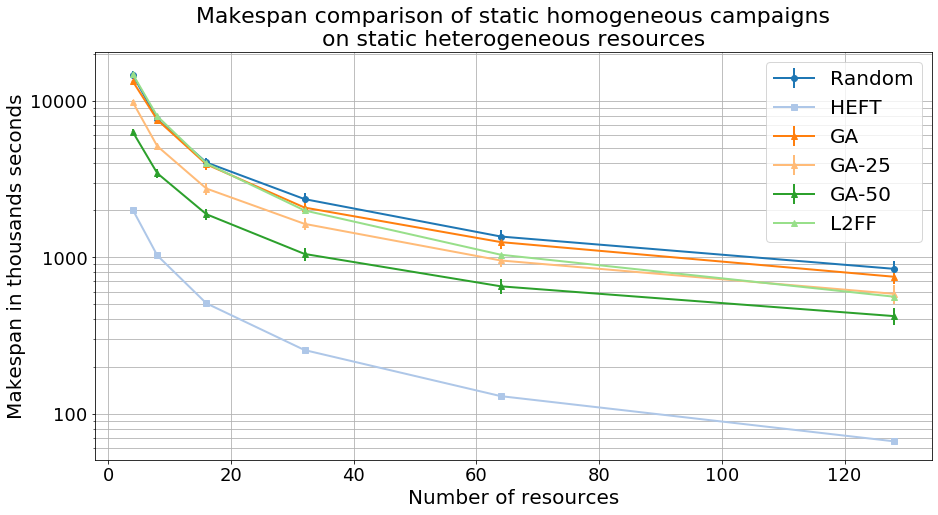

In [17]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values,HeteroResources_StHomogeCampaigns_makespan_stds.xs('RANDOM')['makespan'].values, color=tab20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('HEFT').index,HeteroResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=tab20(1),linewidth=2)
_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('GA').index, HeteroResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values,HeteroResources_StHomogeCampaigns_makespan_stds.xs('GA')['makespan'].values, color=tab20(2),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('GA-25').index, HeteroResources_StHomogeCampaigns_makespan_means.xs('GA-25')['makespan'].values,HeteroResources_StHomogeCampaigns_makespan_stds.xs('GA-25')['makespan'].values, color=tab20(3),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('GA-50').index, HeteroResources_StHomogeCampaigns_makespan_means.xs('GA-50')['makespan'].values,HeteroResources_StHomogeCampaigns_makespan_stds.xs('GA-50')['makespan'].values, color=tab20(4),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(HeteroResources_StHomogeCampaigns_makespan_means.xs('GA-50').index, HeteroResources_StHomogeCampaigns_makespan_means.xs('L2FF')['makespan'].values, color=tab20(5),marker='^',label='L2FF',linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.set_title('Makespan comparison of static homogeneous campaigns\non static heterogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHeteroResources_StHomoCampaigns.png',bbox_inches='tight')

In [ ]:
#DiffStHomoCamp_4StHomoResHE = abs(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HeteroResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResGA = abs(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HeteroResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values)
#DiffStHomoCamp_4StHomoResHEGA = (HeteroResources_StHomogeCampaigns_makespan_means.xs('GA')['makespan'].values - HeteroResources_StHomogeCampaigns_makespan_means.xs('HEFT')['makespan'].values)
#fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
#_ = axis.plot(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT', color=set1(3))
#_ = axis.plot(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA', color=set1(4))
#_ = axis.plot(HeteroResources_StHomogeCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT', color=set1(6))
#_ = axis.set_yscale('log')
#_ = axis.set_ylabel('Makespan difference in thousands seconds',fontsize=20)
#_ = axis.set_xlabel('Number of resources',fontsize=20)
#_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
#_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
#_ = axis.grid('on', which='both')
#_ = axis.legend(fontsize=20)
#_ = axis.set_title("Makespan difference between planner's placement\nof static homogeneous campaigns on static heterogeneous resources", fontsize=22)
#fig.savefig('StHeteroResources_StHomoCampaigns_diff.png',bbox_inches='tight')

# Heterogeneous Campaign

The following figures compare the makespan of a heterogeneous campaign. The campaign is the same as in Experiment 1. As we can see from the following figure, HEFT provides the best makespan, while the random planner has the worst makespan. What is interesting is that the random planner's makespan increases significantly for 64 and 128 resources. The random planner's makespan is not only affected the number of workflows per resource, but also by which workflows are placed in each resource. 

In [18]:
HeteroResources_StHeteroCampaigns = pd.read_csv('../Data/HeteroResources_StHeteroCampaigns.csv')

HeteroResources_StHeteroCampaigns = HeteroResources_StHeteroCampaigns.groupby(by=['planner','size'])
HeteroResources_StHeteroCampaigns_makespan_means = HeteroResources_StHeteroCampaigns.mean()
HeteroResources_StHeteroCampaigns_makespan_stds = HeteroResources_StHeteroCampaigns.std()

In [19]:
#pprint(HeteroResources_StHeteroCampaigns_makespan_means/1000)

In [20]:
#pprint(HeteroResources_StHeteroCampaigns_makespan_stds/1000)

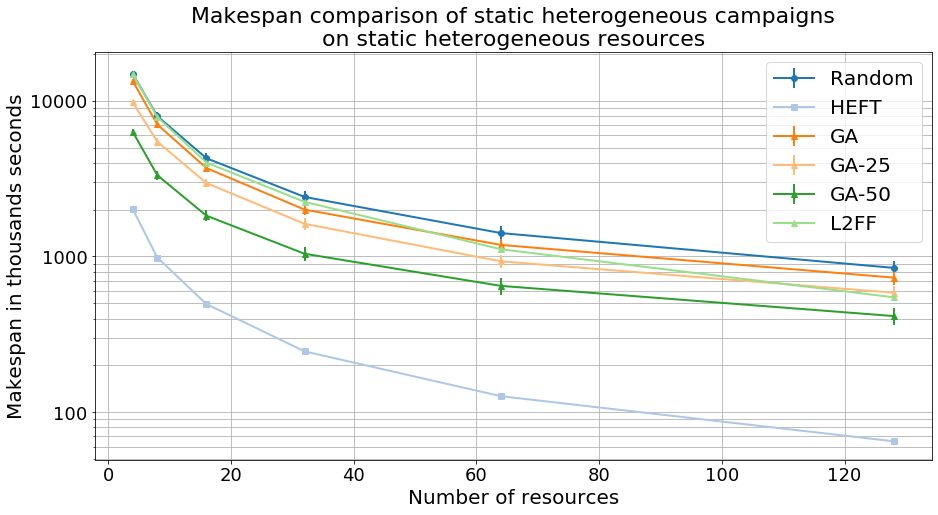

In [21]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values,HeteroResources_StHeteroCampaigns_makespan_stds.xs('RANDOM')['makespan'].values, color=tab20(0),marker='o',label='Random',linewidth=2)
_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT').index,HeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values,marker='s',label='HEFT', color=tab20(1),linewidth=2)
_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('GA').index, HeteroResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values,HeteroResources_StHeteroCampaigns_makespan_stds.xs('GA')['makespan'].values, color=tab20(2),marker='^',label='GA',linewidth=2)
_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('GA-25').index, HeteroResources_StHeteroCampaigns_makespan_means.xs('GA-25')['makespan'].values,HeteroResources_StHeteroCampaigns_makespan_stds.xs('GA-25')['makespan'].values, color=tab20(3),marker='^',label='GA-25',linewidth=2)
_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('GA-50').index, HeteroResources_StHeteroCampaigns_makespan_means.xs('GA-50')['makespan'].values,HeteroResources_StHeteroCampaigns_makespan_stds.xs('GA-50')['makespan'].values, color=tab20(4),marker='^',label='GA-50',linewidth=2)
_ = axis.errorbar(HeteroResources_StHeteroCampaigns_makespan_means.xs('GA-50').index, HeteroResources_StHeteroCampaigns_makespan_means.xs('L2FF')['makespan'].values, color=tab20(5),marker='^',label='L2FF',linewidth=2)
# _ = axis.fill_between(workflows_sizes, min_vals, max_vals, color=greens(250), alpha=0.2, label='RANDOM Max-Min')
_ = axis.set_yscale('log')
_ = axis.set_ylabel('Makespan in thousands seconds',fontsize=20)
_ = axis.set_xlabel('Number of resources',fontsize=20)
_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
_ = axis.grid('on', which='both')
_ = axis.set_title('Makespan comparison of static heterogeneous campaigns\non static heterogeneous resources', fontsize=22)
_ = axis.legend(fontsize=20)
#fig.savefig('StHeteroResources_StHeteroCampaigns.png',bbox_inches='tight')
#fig.savefig('StHeteroResources_StHeteroCampaigns.pdf',bbox_inches='tight')

In [22]:
#DiffStHomoCamp_4StHomoResHE = abs(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values)
#DiffStHomoCamp_4StHomoResGA = abs(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM')['makespan'].values - HeteroResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values)
#DiffStHomoCamp_4StHomoResHEGA = (HeteroResources_StHeteroCampaigns_makespan_means.xs('GA')['makespan'].values - HeteroResources_StHeteroCampaigns_makespan_means.xs('HEFT')['makespan'].values)
#fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,7.5))
#_ = axis.plot(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHE, marker='o',linewidth=2, label='Diff RA - HEFT', color=set1(3))
#_ = axis.plot(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResGA, marker='o',linewidth=2, label='Diff RA - GA', color=set1(4))
#_ = axis.plot(HeteroResources_StHeteroCampaigns_makespan_means.xs('RANDOM').index, DiffStHomoCamp_4StHomoResHEGA, marker='o',linewidth=2, label='Diff GA - HEFT', color=set1(6))
#_ = axis.set_yscale('log')
#_ = axis.set_ylabel('Makespan difference in thousands seconds',fontsize=20)
#_ = axis.set_xlabel('Number of resoruces',fontsize=20)
#_ = axis.set_xticklabels(axis.get_xticks().astype('int').tolist(),fontsize=18)
#_ = axis.set_yticklabels((axis.get_yticks()/1000).astype('int').tolist(),fontsize=18)
#_ = axis.grid('on', which='both')
#_ = axis.legend(fontsize=20)
#_ = axis.set_title("Makespan difference between planner's placement\nof static heterogeneous campaigns on static heterogeneous resources", fontsize=22)
#fig.savefig('StHeteroResources_StHeteroCampaigns_diff.png',bbox_inches='tight')
#fig.savefig('StHeteroResources_StHeteroCampaigns_diff.pdf',bbox_inches='tight')